In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<Figure size 640x480 with 0 Axes>

In [ ]:
!pip install google-colab

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# Access your dataset
dataset_path = '/content/drive/My Drive/data.csv'
import pandas as pd
df = pd.read_csv(dataset_path)

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [ ]:
# Check the null value in each attributes

df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
total_rev_hi_lim,67313
inq_fi,842681
total_cu_tl,842681
inq_last_12m,842681


In [ ]:
# total_rev_hi_lim

# Fill missing values in total_rev_hi_lim with Simple Imputer

imputer = SimpleImputer(strategy='median')
total_rev_hi_lim = df['total_rev_hi_lim'].values.reshape(-1,1)
total_rev_hi_lim_imputed = imputer.fit_transform(total_rev_hi_lim)
df['total_rev_hi_lim'] = total_rev_hi_lim_imputed

In [ ]:
# Check the null value in each attributes

df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
total_rev_hi_lim,0
inq_fi,842681
total_cu_tl,842681
inq_last_12m,842681


In [ ]:
# home_ownership

# Remove rows with value ANY

df = df[df['home_ownership'] != 'ANY']
df['home_ownership'].unique()

# Level encoding for home ownership

home_type = ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(home_type)

# Encode the 'grade' column in the DataFrame
df['home_ownership'] = encoder.transform(df['home_ownership'])

In [ ]:
# Purpose

# Label encoding for purpose

df['purpose'].unique()

purposes = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(purposes)
# Encode the 'grade' column in the DataFrame
df['purpose'] = encoder.transform(df['purpose'])

In [ ]:
# sub_grade

# Sort the order of subgrades and do label encoding

subgrades = ['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5']

def custom_sort_key(subgrade):
    match = re.match(r'([A-Za-z]+)(\d+)', subgrade)
    letter = match.group(1)
    number = int(match.group(2))

    return letter, number

sorted_subgrades = sorted(subgrades, key=custom_sort_key)

# Level encoding for sorted sub-grade

encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(sorted_subgrades)

# Encode the 'grade' column in the DataFrame
df['sub_grade'] = encoder.transform(df['sub_grade'])

In [ ]:
# employment_lengths

employment_lengths = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'nan']

label_encoder = LabelEncoder()

# Fit the LabelEncoder with unique values
label_encoder.fit(employment_lengths)

# Encode the attribute values
df['emp_length'] = label_encoder.transform(df['emp_length'])

In [ ]:
# mths_since_last_delinq

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(-1)

In [ ]:
# mths_since_last_record

df['mths_since_last_record'] = df['mths_since_last_record'].fillna(-1)

In [ ]:
# revol_util
# Handle missing value with imputer

imputer = SimpleImputer(strategy='mean')

revol_util = df['revol_util'].values.reshape(-1,1)

revol_util_imputed = imputer.fit_transform(revol_util)

df['revol_util'] = revol_util_imputed

In [ ]:
# aggregate annual_inc and annual_inc_joint

df.loc[df['application_type'] == 'JOINT', 'annual_inc'] = df.loc[df['application_type'] == 'JOINT', 'annual_inc_joint']
df = df.drop('annual_inc_joint', axis=1)

In [ ]:
# dti_joint

df.loc[df['application_type'] == 'JOINT', 'dti'] = df.loc[df['application_type'] == 'JOINT', 'dti_joint']
df = df.drop('dti_joint', axis=1)

In [ ]:
# verification_status_joint

df.loc[df['application_type'] == 'JOINT', 'verification_status'] = df.loc[df['application_type'] == 'JOINT', 'verification_status_joint']
df = df.drop('verification_status_joint', axis=1)

In [ ]:
# term
# Label encoding for term

term = [' 36 months', ' 60 months']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(term)

# Encode the 'grade' column in the DataFrame
df['term'] = encoder.transform(df['term'])

In [ ]:
# verification_status

veri = ['Not Verified', 'Source Verified', 'Verified']  # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(veri)


df['verification_status'] = encoder.transform(df['verification_status'])

In [ ]:
# pymnt_plan

plan = ['n', 'y']  # Unique values for encoding

encoder = LabelEncoder()
encoder.fit(plan)
df['pymnt_plan'] = encoder.transform(df['pymnt_plan'])

In [ ]:
# application_type

type = ['INDIVIDUAL', 'JOINT'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(type)

df['application_type'] = encoder.transform(df['application_type'])

In [ ]:
# initial_list_status

status = ['f', 'w'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(status)

df['initial_list_status'] = encoder.transform(df['initial_list_status'])

In [ ]:
# Fill missing last credit pull
df['last_credit_pull_d'].fillna("25-07-2023", inplace=True)

In [ ]:
# Credit History Length:
# Calculated as: last_credit_pull - earliest_cr_line
def date_difference(date_str1, date_str2):
    # Convert date strings to datetime objects
    date_format = "%d-%m-%Y"
    date1 = datetime.strptime(date_str1, date_format)
    date2 = datetime.strptime(date_str2, date_format)

    # Calculate the difference
    difference = date2 - date1

    # Return the difference in days
    return difference.days

df['credit_history_length'] = df.apply(lambda row: date_difference(row['earliest_cr_line'], row['last_credit_pull_d']), axis=1)

# Swap the values and column names
df['default_ind'], df['credit_history_length'] = df['credit_history_length'], df['default_ind']
df.rename(columns={'default_ind': 'credit_history_length', 'credit_history_length': 'default_ind'}, inplace=True)

In [ ]:
# Drop not usable attributes

remove_col = [
    'id',
    'member_id',
    'emp_title',
    'issue_d',
    'desc',
    'title',
    'zip_code',
    'addr_state',
    'earliest_cr_line',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'tot_coll_amt',
    'tot_cur_bal',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m' ,
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'grade'
]

df = df.drop(remove_col, axis=1)

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,application_type,acc_now_delinq,total_rev_hi_lim,credit_history_length,default_ind
0,5000,5000,4975.0,0,10.65,162.87,6,1,4,24000.0,...,5000.00,861.07,0.00,0.00,0.00,0,0,23800.0,11322,0
1,2500,2500,2500.0,1,15.27,59.83,13,10,4,30000.0,...,456.46,435.17,0.00,117.08,1.11,0,0,23800.0,5267,1
2,2400,2400,2400.0,0,15.96,84.33,14,1,4,12252.0,...,2400.00,603.65,0.00,0.00,0.00,0,0,23800.0,5174,0
3,10000,10000,10000.0,0,13.49,339.31,10,1,4,49200.0,...,10000.00,2209.33,16.97,0.00,0.00,0,0,23800.0,6909,0
4,3000,3000,3000.0,1,12.69,67.79,9,0,4,80000.0,...,2233.10,1009.07,0.00,0.00,0.00,0,0,23800.0,7305,0


In [ ]:
df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0


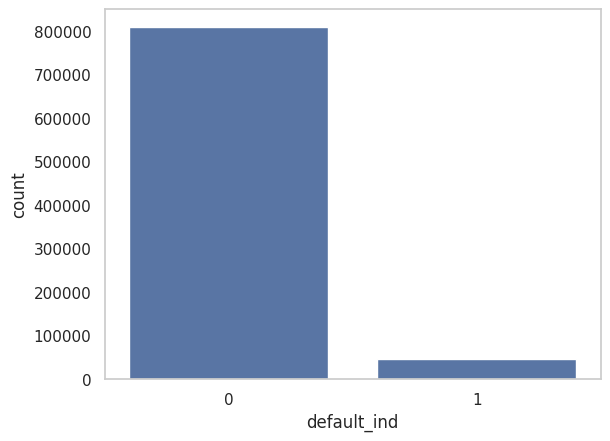

In [ ]:
# Visualize default_ind attribute

sns.countplot(data=df, x='default_ind')
plt.show()

In [ ]:
df['default_ind'].sum()

46467

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CreditUtilizationRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, include=True):
        self.revol_bal_col = 'revol_bal'
        self.annual_inc_col = 'annual_inc'
        self.installment_col = 'installment'
        self.total_rec_prncp_col = 'total_rec_prncp'
        self.funded_amnt_col = 'funded_amnt'

        self.include_rev_to_inc_ratio = include
        self.include_loan_to_inc_ratio = include
        self.include_repayment_progress = include


    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Find index of columns
        revol_bal_ix = np.where(X.columns == self.revol_bal_col)[0][0]
        annual_inc_ix = np.where(X.columns == self.annual_inc_col)[0][0]
        installment_ix = np.where(X.columns == self.installment_col)[0][0]
        total_rec_prncp_ix = np.where(X.columns == self.total_rec_prncp_col)[0][0]
        funded_amnt_ix = np.where(X.columns == self.funded_amnt_col)[0][0]

        # Calculate the Revolving Credit Balance to Annual Income Ratio.
        rev_to_inc_ratio = X.iloc[:, revol_bal_ix] / X.iloc[:, annual_inc_ix]

        # Calculate the Loan Payment-to-Income Ratio.
        loan_to_inc_ratio = X.iloc[:, installment_ix] / (X.iloc[:, annual_inc_ix] / 12)

        # Calculate the Repayment Progress.
        repayment_progress = (X.iloc[:, total_rec_prncp_ix] / X.iloc[:, funded_amnt_ix]) * 100

        if self.include_rev_to_inc_ratio:
            # Add the calculated Revolving Credit Balance to Annual Income Ratio as a new column to the input data.
            X['Rev_to_Inc_Ratio'] = rev_to_inc_ratio

        if self.include_loan_to_inc_ratio:
            # Add the calculated Loan Payment-to-Income Ratio as a new column to the input data.
            X['Loan_Payment_to_Income_Ratio'] = loan_to_inc_ratio

        if self.include_repayment_progress:
            # Add the calculated Repayment Progress as a new column to the input data.
            X['Repayment_Progress'] = repayment_progress

        return X

<Axes: >

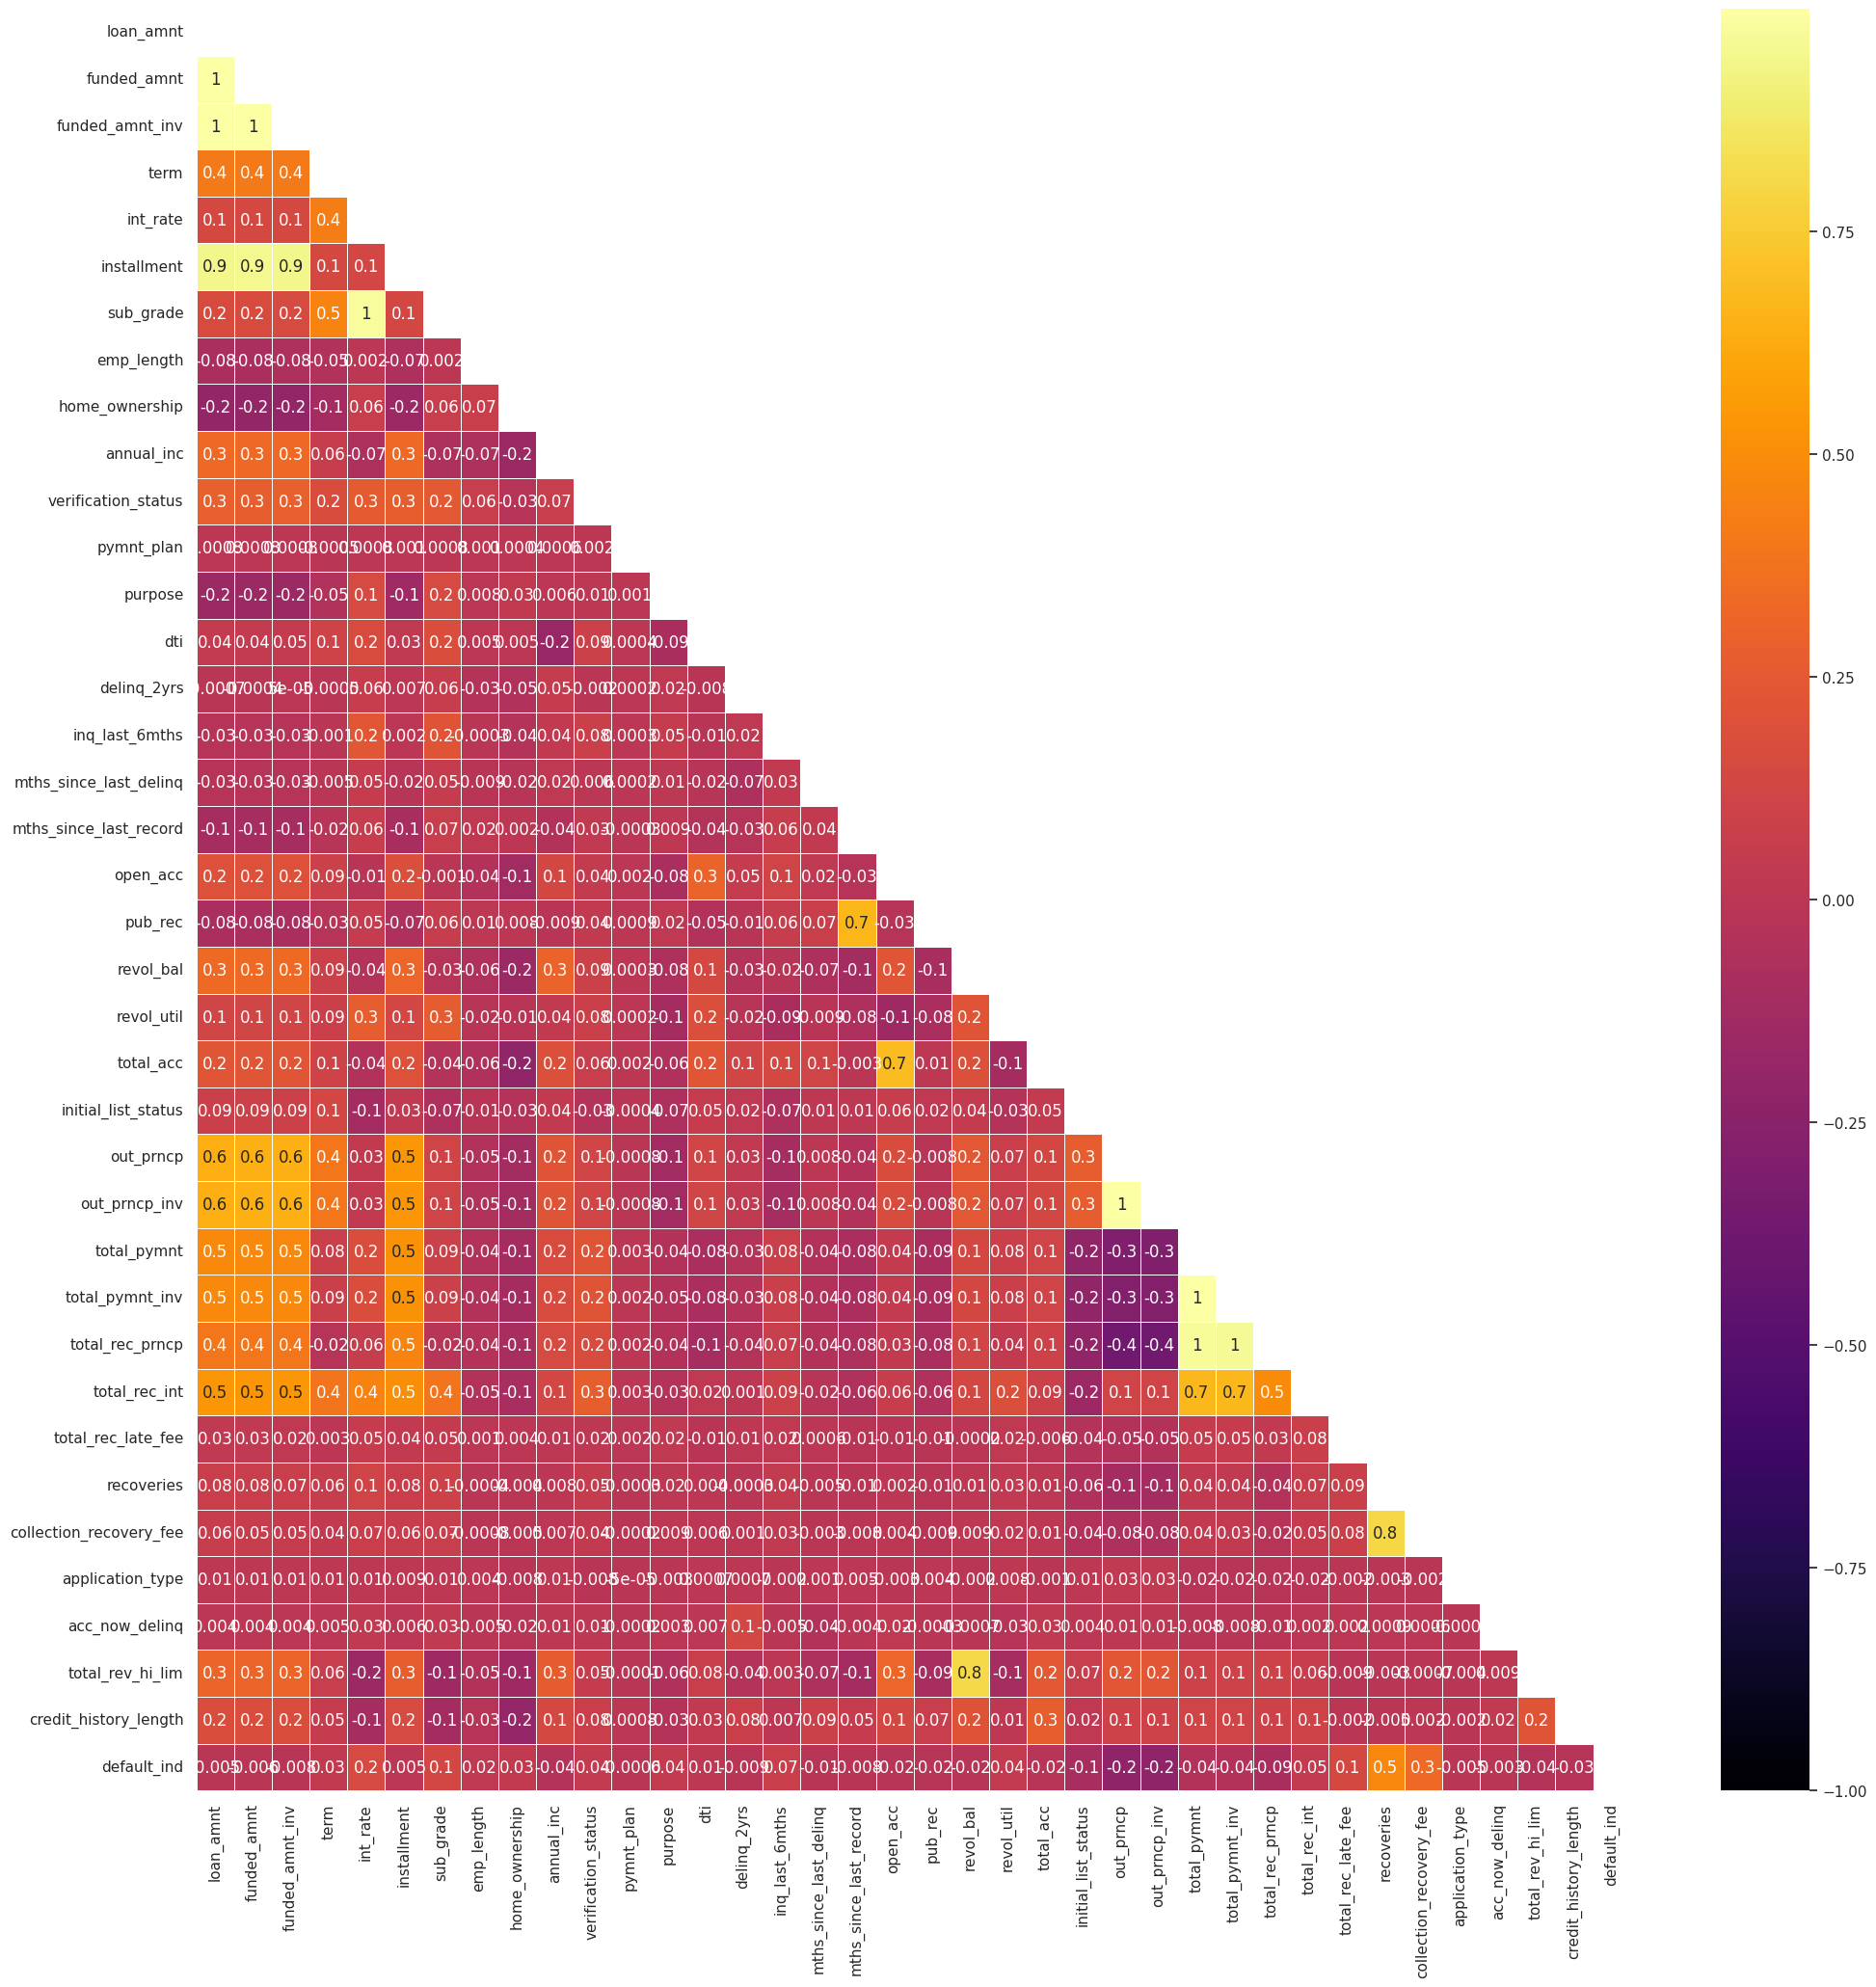

In [ ]:
numerical_df = df.select_dtypes(include='number')

mask = np.zeros_like(numerical_df.corr().fillna(0), dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(numerical_df.corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

In [ ]:
selected_features = [
    'collection_recovery_fee'   ,
    'acc_now_delinq' ,
    'funded_amnt'   ,
    'funded_amnt_inv'   ,
    'mths_since_last_record' ,
    'delinq_2yrs'   ,
    'dti'            ,
    'mths_since_last_delinq'  ,
    'emp_length',
    'pub_rec'   ,
    'revol_bal'    ,
    'credit_history_length'  ,
    'term'   ,
    'home_ownership' ,
    'total_rev_hi_lim'  ,
    'total_pymnt'      ,
    'total_pymnt_inv'  ,
    'purpose'   ,
    'revol_util'   ,
    'total_rec_int'   ,
    'inq_last_6mths'  ,
    'total_rec_prncp' ,
    'sub_grade'        ,
    'total_rec_late_fee'   ,
    'int_rate'   ,
    'out_prncp_inv'  ,
    'out_prncp'   ,
    'recoveries'
]
X = df[selected_features]
y = df['default_ind']

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (684772, 28)
X_test shape: (171194, 28)
y_train shape: (684772,)
y_test shape: (171194,)


In [ ]:
y

,default_ind
0,0
1,1
2,0
3,0
4,0
...,...
855964,0
855965,0
855966,0
855967,0


In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)  # You can adjust the random_state

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shapes of the resampled datasets
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.1 MB/s eta 0:00:00
X_train_resampled shape: (1295262, 28)
y_train_resampled shape: (1295262,)


In [ ]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

In [ ]:
X_train_final.shape

(1036209, 28)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
def create_windows(data, window_size):
  """
  Creates overlapping windows from a DataFrame.

  Args:
    data: Pandas DataFrame.
    window_size: Size of each window.

  Returns:
    NumPy array of windows.
  """

  windows = []
  for i in range(len(data) - window_size + 1):
    window = data[i: i + window_size]
    windows.append(window)
  return np.array(windows)

# Example usage:
window_size = 5  # Adjust as needed
X_train_windows = create_windows(X_train_resampled, window_size)
y_train_windows = y_train_resampled[window_size - 1:]  # Adjust target variable accordingly

# Print the shapes of the windowed data
print("X_train_windows shape:", X_train_windows.shape)
print("y_train_windows shape:", y_train_windows.shape)

X_train_windows shape: (1295258, 5, 28)
y_train_windows shape: (1295258,)


In [ ]:
X_test_windows = create_windows(X_test, window_size)
y_test_windows = y_test[window_size - 1:]  # Adjust target variable accordingly

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Determine the input shape
num_features = X_train_windows.shape[2]

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, num_features)))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_windows, y_train_windows, epochs=100, batch_size=32)  # Adjust epochs and batch_size

# Evaluate the model on the windowed test data
loss, accuracy = model.evaluate(X_test_windows, y_test_windows)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/100
40477/40477 [==============================] - 237s 6ms/step - loss: 0.0329 - accuracy: 0.9905
Epoch 2/100
40477/40477 [==============================] - 240s 6ms/step - loss: 0.0201 - accuracy: 0.9950
Epoch 3/100
40477/40477 [==============================] - 250s 6ms/step - loss: 0.0146 - accuracy: 0.9970
Epoch 4/100
40477/40477 [==============================] - 235s 6ms/step - loss: 0.0150 - accuracy: 0.9969
Epoch 5/100
40477/40477 [==============================] - 245s 6ms/step - loss: 0.0138 - accuracy: 0.9971
Epoch 6/100
40477/40477 [==============================] - 230s 6ms/step - loss: 0.0129 - accuracy: 0.9976
Epoch 7/100
40477/40477 [==============================] - 245s 6ms/step - loss: 0.0129 - accuracy: 0.9974
Epoch 8/100
40477/40477 [==============================] - 250s 6ms/step - loss: 0.0124 - accuracy: 0.9978
Epoch 9/100
40477/40477 [==============================] - 253s 6ms/step - loss: 0.0122 - accuracy: 0.9977
Epoch 10/100
40477/40477 [===========

5350/5350 [==============================] - 16s 3ms/step


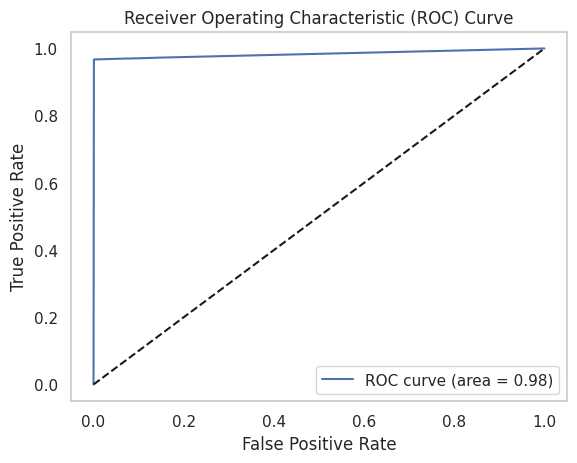

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities from the model
y_pred_prob = model.predict(X_test_windows)

# Assuming you have true labels (y_test_windows) and predicted probabilities (y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test_windows, y_pred_prob)
auc = roc_auc_score(y_test_windows, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Get predicted probabilities
y_pred_prob = model.predict(X_test_windows)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int) # You may need to adjust the threshold

# Calculate the confusion matrix
cm = confusion_matrix(y_test_windows, y_pred)

print("Confusion Matrix:")
print(cm)

5350/5350 [==============================] - 16s 3ms/step
Confusion Matrix:
[[161655    210]
 [   305   9020]]


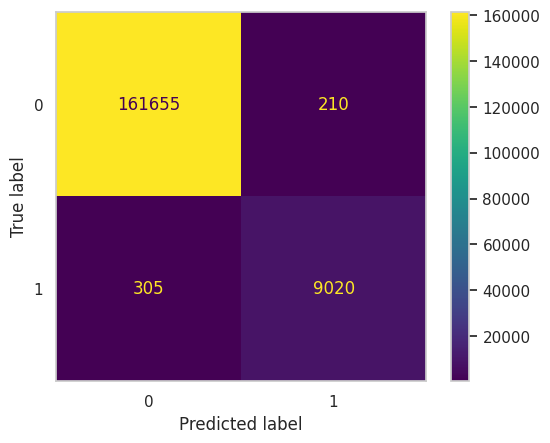

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have true labels (y_test_windows) and predicted labels (y_pred)
cm = confusion_matrix(y_test_windows, y_pred)

# Use ConfusionMatrixDisplay to create the plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have true labels (y_test_windows) and predicted labels (y_pred)
accuracy = accuracy_score(y_test_windows, y_pred) # Changed y_true to y_test_windows
precision = precision_score(y_test_windows, y_pred) # Changed y_true to y_test_windows
recall = recall_score(y_test_windows, y_pred) # Changed y_true to y_test_windows
f1 = f1_score(y_test_windows, y_pred) # Changed y_true to y_test_windows

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9969916467083357
Precision: 0.9772481040086674
Recall: 0.9672922252010724
F1-Score: 0.9722446779843708


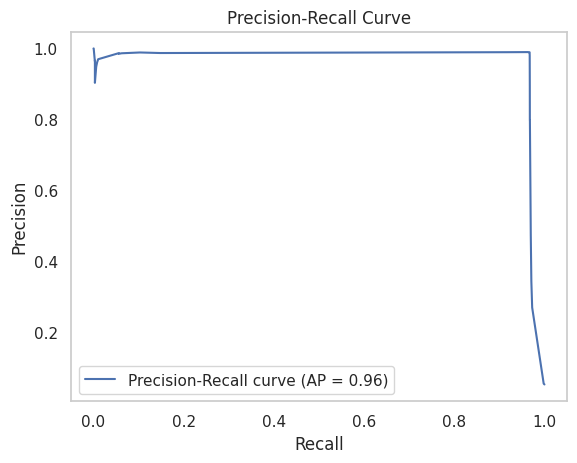

In [ ]:
# prompt: plot precision and recall curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Assuming you have true labels (y_test_windows) and predicted probabilities (y_pred_prob)
precision, recall, thresholds = precision_recall_curve(y_test_windows, y_pred_prob)
average_precision = average_precision_score(y_test_windows, y_pred_prob)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


Epoch 1/100
32382/32382 [==============================] - 206s 6ms/step - loss: 0.0127 - accuracy: 0.9978 - val_loss: 0.0011 - val_accuracy: 0.9999
Epoch 2/100
32382/32382 [==============================] - 220s 7ms/step - loss: 0.0120 - accuracy: 0.9980 - val_loss: 8.6482e-04 - val_accuracy: 0.9999
Epoch 3/100
32382/32382 [==============================] - 217s 7ms/step - loss: 0.0117 - accuracy: 0.9980 - val_loss: 0.0017 - val_accuracy: 0.9993
Epoch 4/100
32382/32382 [==============================] - 216s 7ms/step - loss: 0.0114 - accuracy: 0.9981 - val_loss: 0.0011 - val_accuracy: 0.9999
Epoch 5/100
32382/32382 [==============================] - 209s 6ms/step - loss: 0.0128 - accuracy: 0.9977 - val_loss: 0.0019 - val_accuracy: 0.9998
Epoch 6/100
32382/32382 [==============================] - 218s 7ms/step - loss: 0.0148 - accuracy: 0.9969 - val_loss: 0.0022 - val_accuracy: 0.9998
Epoch 7/100
32382/32382 [==============================] - 223s 7ms/step - loss: 0.0123 - accuracy: 0.

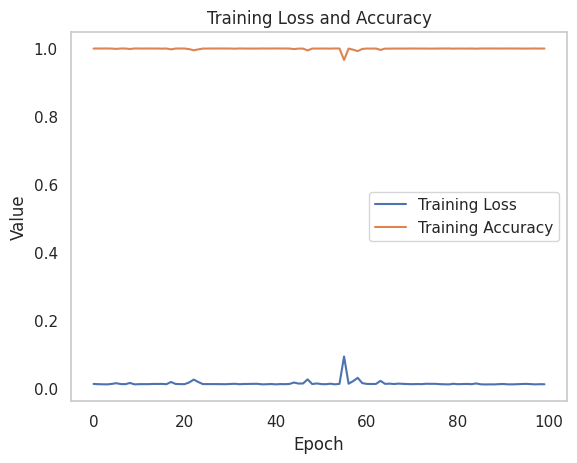

In [ ]:
# Assuming 'model' is your compiled Keras model and you have your training data in 'X_train' and 'y_train'

# Fit the model and store the training history
history = model.fit(X_train_windows, y_train_windows, epochs=100, batch_size=32, validation_split=0.2)

# Access the training history
print(history.history.keys())

# Plot the training history (this is the code from the previous response)
if hasattr(model, 'history') and 'loss' in model.history.history and 'accuracy' in model.history.history:
    plt.plot(model.history.history['loss'], label='Training Loss')
    plt.plot(model.history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Loss and Accuracy')
    plt.legend()
    plt.show()
else:
    print("Training history is not available or does not contain loss and accuracy data.")